In [1]:
# 加载所需的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#加载result.csv这个数据
text = pd.read_csv('../titanic/result.csv')


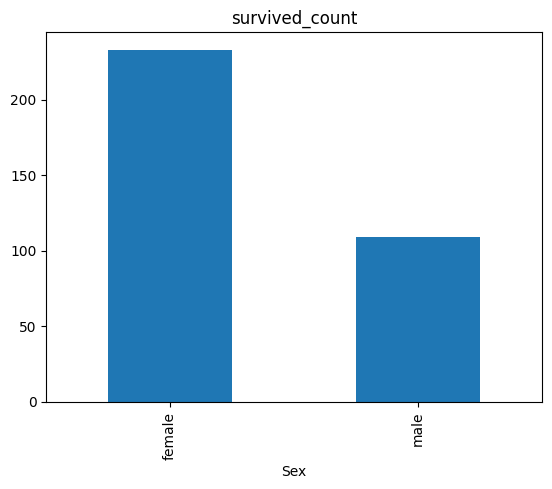

In [34]:
#任务二：可视化展示泰坦尼克号数据集中男女中生存人数分布情况（用柱状图试试）
survied = text['Survived'].groupby(text['Sex']).sum()
survied.plot.bar()
plt.title('survived_count')
plt.show()


In [26]:
(text['Sex'] == 'male').sum()


577

In [28]:
(text['Survived'] == 0).groupby(text['Sex']).sum()


Sex
female     81
male      468
Name: Survived, dtype: int64

In [30]:
text['Survived'].groupby(text['Sex']).sum()


Sex
female    233
male      109
Name: Survived, dtype: int64

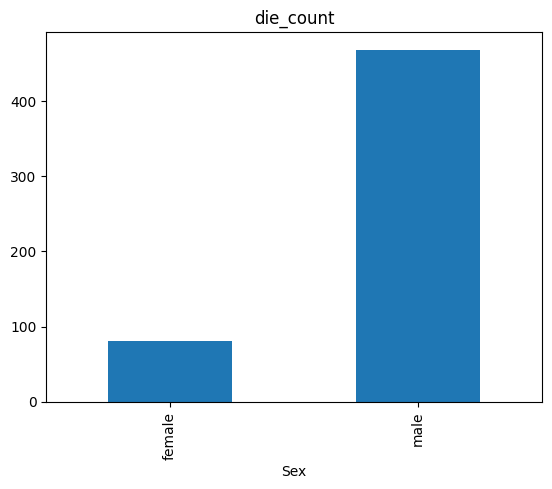

In [35]:
#【思考】计算出泰坦尼克号数据集中男女中死亡人数，并可视化展示？
unsurvied = (text['Survived'] == 0).groupby(text['Sex']).sum()
unsurvied.plot.bar()
plt.title('die_count')
plt.show()


Text(0, 0.5, 'count')

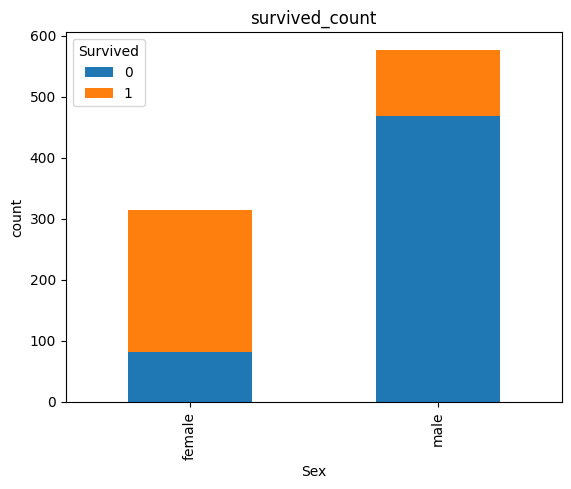

In [33]:
# 提示：计算男女中死亡人数 1表示生存，0表示死亡
text.groupby(['Sex','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked='True') #DataFrame.plot函数详解（一）：https://blog.csdn.net/qq_39065491/article/details/132431041
plt.title('survived_count')
plt.ylabel('count')


Text(0, 0.5, 'count')

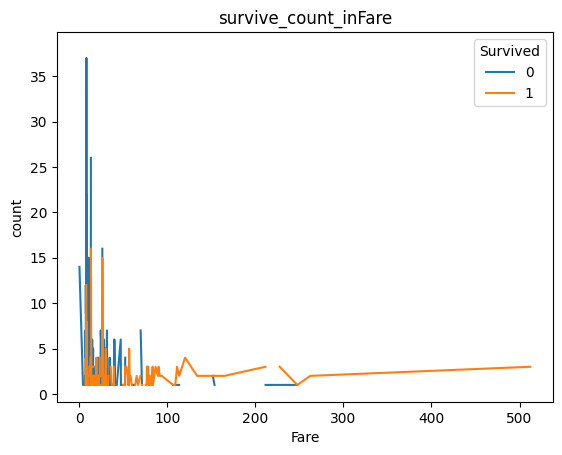

In [55]:
#任务四：可视化展示泰坦尼克号数据集中不同票价的人生存和死亡人数分布情况。（用折线图试试）（横轴是不同票价，纵轴是存活人数）
survied_fare = (text['Survived'] == 1).groupby(text['Fare']).sum()
die_fare = (text['Survived'] == 0).groupby(text['Fare']).sum()
survive_fare = text['Survived'].groupby([text['Fare'],text['Survived']]).count().unstack()
survive_fare
survive_fare.plot()
plt.title('survive_count_inFare')
plt.ylabel('count')


In [57]:
surive_fare.describe()


count  mean  std  min  25%  50%  75%  max
Fare     Survived Survived                                           
0.0000   False    True       14.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
         True     False       1.0   1.0  NaN  1.0  1.0  1.0  1.0  1.0
4.0125   False    True        1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
5.0000   False    True        1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
6.2375   False    True        1.0   0.0  NaN  0.0  0.0  0.0  0.0  0.0
...                           ...   ...  ...  ...  ...  ...  ...  ...
247.5208 True     False       1.0   1.0  NaN  1.0  1.0  1.0  1.0  1.0
262.3750 True     False       2.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
263.0000 False    True        2.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
         True     False       2.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
512.3292 True     False       3.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0

[330 rows x 8 columns]

Text(0, 0.5, 'count')

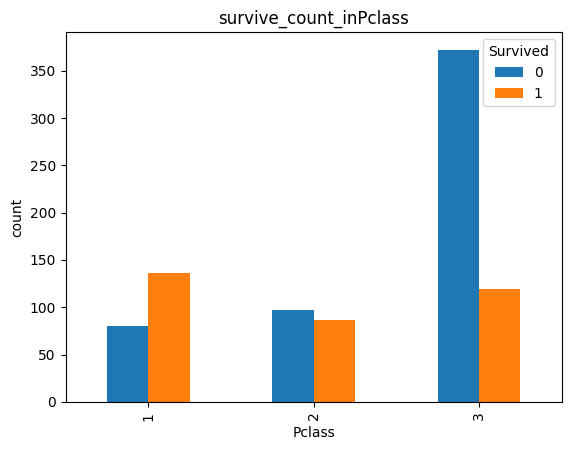

In [65]:
# 任务五：可视化展示泰坦尼克号数据集中不同仓位等级的人生存和死亡人员的分布情况。（用柱状图试试）
survive_cabin = text['Survived'].groupby([text['Pclass'],text['Survived']]).count().unstack()
survive_cabin.plot(kind='bar')
plt.title('survive_count_inPclass')
plt.ylabel('count')


<Axes: xlabel='Pclass', ylabel='count'>

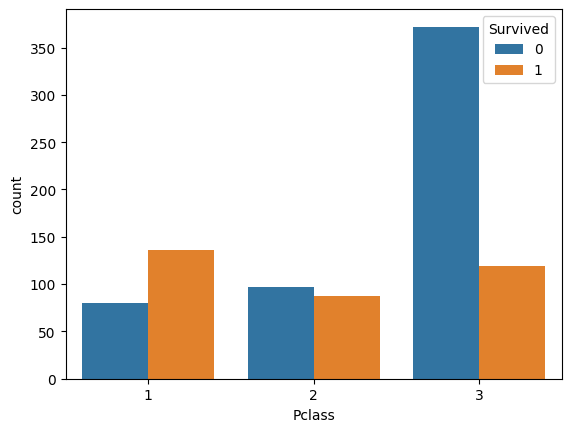

In [77]:
import seaborn as sns
sns.countplot(x="Pclass", hue="Survived", data=text)


Text(0, 0.5, 'count')

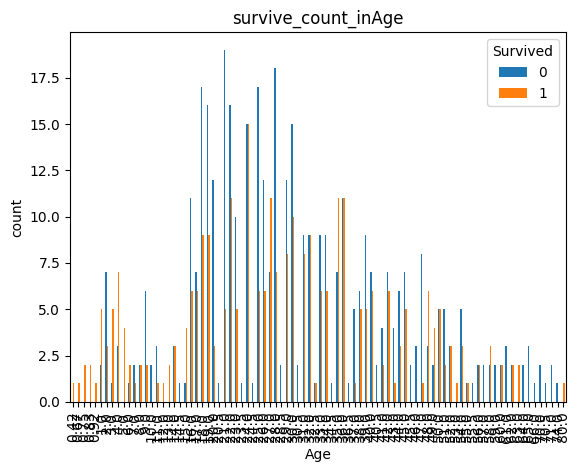

In [71]:
#任务六：可视化展示泰坦尼克号数据集中不同年龄的人生存与死亡人数分布情况。(不限表达方式)
survive_age = text['Survived'].groupby([text['Age'],text['Survived']]).count().unstack()
survive_age.plot(kind='bar')
plt.title('survive_count_inAge')
plt.ylabel('count')


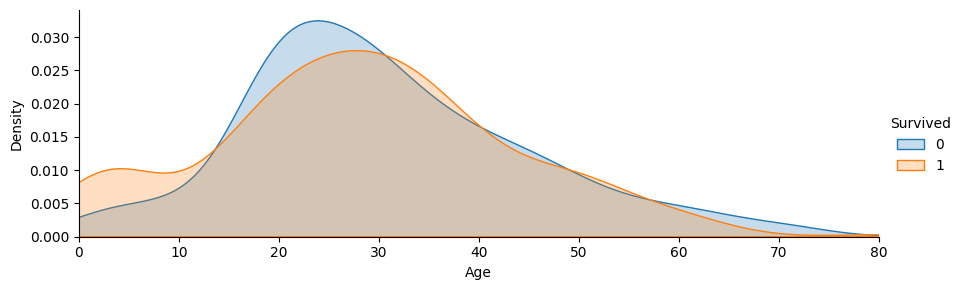

In [85]:
facet = sns.FacetGrid(text, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Age',fill=True)
facet.set(xlim=(0, text['Age'].max()))
facet.add_legend()


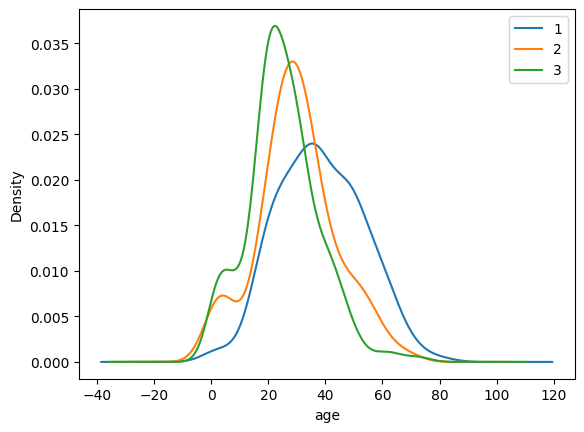

In [104]:
#任务七：可视化展示泰坦尼克号数据集中不同仓位等级的人年龄分布情况。（用折线图试试）
import scipy
text.Age[text.Pclass == 1].plot(kind='kde') #kind=kde:密度图
text.Age[text.Pclass == 2].plot(kind='kde')
text.Age[text.Pclass == 3].plot(kind='kde')
plt.xlabel("age")
plt.legend((1,2,3),loc="best")
